In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.DataFrame(pd.read_csv('base.csv'))

In [3]:
df.head(5)

,Id,ClasseImovel,ClasseZona,Fachada,TamanhoLote,Rua,Beco,FormaProp,PlanoProp,Servicos,...,AreaPiscina,QualidadePiscina,QualidadeCerca,Outros,ValorOutros,MesVenda,AnoVenda,TipoVenda,CondicaoVenda,PrecoVenda
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id                    1460 non-null   int64  
 1   ClasseImovel          1460 non-null   int64  
 2   ClasseZona            1460 non-null   object 
 3   Fachada               1201 non-null   float64
 4   TamanhoLote           1460 non-null   int64  
 5   Rua                   1460 non-null   object 
 6   Beco                  91 non-null     object 
 7   FormaProp             1460 non-null   object 
 8   PlanoProp             1460 non-null   object 
 9   Servicos              1460 non-null   object 
 10  ConfigLote            1460 non-null   object 
 11  InclinacaoLote        1460 non-null   object 
 12  Bairro                1460 non-null   object 
 13  Estrada1              1460 non-null   object 
 14  Estrada2              1460 non-null   object 
 15  TipoHabitacao        

In [5]:
# Para mostrar todas as linhas e colunas do dataset

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [6]:
df.isnull().mean().round(4)*100

Id                       0.00
ClasseImovel             0.00
ClasseZona               0.00
Fachada                 17.74
TamanhoLote              0.00
Rua                      0.00
Beco                    93.77
FormaProp                0.00
PlanoProp                0.00
Servicos                 0.00
ConfigLote               0.00
InclinacaoLote           0.00
Bairro                   0.00
Estrada1                 0.00
Estrada2                 0.00
TipoHabitacao            0.00
EstiloHabitacao          0.00
Qualidade                0.00
Condicao                 0.00
AnoConstrucao            0.00
AnoReforma               0.00
TipoTelhado              0.00
MaterialTelhado          0.00
Exterior1                0.00
Exterior2                0.00
TipoAlvenaria            0.55
AreaAlvenaria            0.55
QualidadeCobertura       0.00
CondicaoExterna          0.00
TipoFundacao             0.00
AlturaPorao              2.53
CondicaoPorao            2.53
ParedePorao              2.60
TipoAcabPo

In [7]:
# as variáveis Beco, QualdiadeLareira, QualidadePiscina, QualidadeCerca, Outros serão excluídas devido ao alto indice de 
# valores nulos

df.drop(['Beco', 'QualdiadeLareira', 'QualidadePiscina', 'QualidadeCerca', 'Outros'], axis= 1, inplace= True)

In [8]:
# tratando a variável 'Fachada'. Vamos tirar uma média de acordo com a 'ClasseZona' para preencher os MV.

df['ClasseZona'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: ClasseZona, dtype: int64

In [9]:
df[df['ClasseZona'] == 'RL']['Fachada'].mean()


74.68004338394793

In [10]:
df[df['ClasseZona'] == 'RM']['Fachada'].mean()

52.36683417085427

In [11]:
df[df['ClasseZona'] == 'FV']['Fachada'].mean()

59.49122807017544

In [12]:
df[df['ClasseZona'] == 'RH']['Fachada'].mean()

58.92307692307692

In [13]:
df[df['ClasseZona'] == 'C (all)']['Fachada'].mean()

69.7

In [14]:
# criando os filtros para preencher os MV.

f_RL = df[df['ClasseZona'] == 'RL']['Fachada'].mean()
df['Fachada'][df['ClasseZona'] == 'RL'] = df['Fachada'].fillna(f_RL)


C:\Users\lucas\AppData\Local\Temp/ipykernel_3584/1276256780.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Fachada'][df['ClasseZona'] == 'RL'] = df['Fachada'].fillna(f_RL)


In [15]:
f_RM = df[df['ClasseZona'] == 'RM']['Fachada'].mean()
df['Fachada'][df['ClasseZona'] == 'RM'] = df['Fachada'].fillna(f_RM)

C:\Users\lucas\AppData\Local\Temp/ipykernel_3584/311017561.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Fachada'][df['ClasseZona'] == 'RM'] = df['Fachada'].fillna(f_RM)


In [16]:
f_FV = df[df['ClasseZona'] == 'FV']['Fachada'].mean()
df['Fachada'][df['ClasseZona'] == 'FV'] = df['Fachada'].fillna(f_FV)

C:\Users\lucas\AppData\Local\Temp/ipykernel_3584/1797435397.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Fachada'][df['ClasseZona'] == 'FV'] = df['Fachada'].fillna(f_FV)


In [17]:
f_RH = df[df['ClasseZona'] == 'RH']['Fachada'].mean()
df['Fachada'][df['ClasseZona'] == 'RH'] = df['Fachada'].fillna(f_RH)

C:\Users\lucas\AppData\Local\Temp/ipykernel_3584/2857994189.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Fachada'][df['ClasseZona'] == 'RH'] = df['Fachada'].fillna(f_RH)


In [18]:
f_C = df[df['ClasseZona'] == 'C (all)']['Fachada'].mean()
df['Fachada'][df['ClasseZona'] == 'C (all)'] = df['Fachada'].fillna(f_C)

C:\Users\lucas\AppData\Local\Temp/ipykernel_3584/3655048961.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Fachada'][df['ClasseZona'] == 'C (all)'] = df['Fachada'].fillna(f_C)


In [19]:
df.isnull().mean().round(4)*100

Id                      0.00
ClasseImovel            0.00
ClasseZona              0.00
Fachada                 0.00
TamanhoLote             0.00
Rua                     0.00
FormaProp               0.00
PlanoProp               0.00
Servicos                0.00
ConfigLote              0.00
InclinacaoLote          0.00
Bairro                  0.00
Estrada1                0.00
Estrada2                0.00
TipoHabitacao           0.00
EstiloHabitacao         0.00
Qualidade               0.00
Condicao                0.00
AnoConstrucao           0.00
AnoReforma              0.00
TipoTelhado             0.00
MaterialTelhado         0.00
Exterior1               0.00
Exterior2               0.00
TipoAlvenaria           0.55
AreaAlvenaria           0.55
QualidadeCobertura      0.00
CondicaoExterna         0.00
TipoFundacao            0.00
AlturaPorao             2.53
CondicaoPorao           2.53
ParedePorao             2.60
TipoAcabPorao1          2.53
AreaAcabPorao1          0.00
TipoAcabPorao2

In [20]:
# com as outras variáveis apresentam um n. pequeno de MV, vamos excluir as observações onde contem MV.
df.dropna(inplace= True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id                    1338 non-null   int64  
 1   ClasseImovel          1338 non-null   int64  
 2   ClasseZona            1338 non-null   object 
 3   Fachada               1338 non-null   float64
 4   TamanhoLote           1338 non-null   int64  
 5   Rua                   1338 non-null   object 
 6   FormaProp             1338 non-null   object 
 7   PlanoProp             1338 non-null   object 
 8   Servicos              1338 non-null   object 
 9   ConfigLote            1338 non-null   object 
 10  InclinacaoLote        1338 non-null   object 
 11  Bairro                1338 non-null   object 
 12  Estrada1              1338 non-null   object 
 13  Estrada2              1338 non-null   object 
 14  TipoHabitacao         1338 non-null   object 
 15  EstiloHabitacao      

In [22]:
# tratamos inicialmente os dados, deixando todas as variáveis com o mesmo n. de observação.


# Análise Exploratória seguindo o modelo da TERA

In [23]:
df['PrecoVenda'].describe()

count      1338.000000
mean     186761.782511
std       78913.847668
min       35311.000000
25%      135000.000000
50%      168500.000000
75%      220000.000000
max      755000.000000
Name: PrecoVenda, dtype: float64

<AxesSubplot:xlabel='ClasseZona', ylabel='PrecoVenda'>

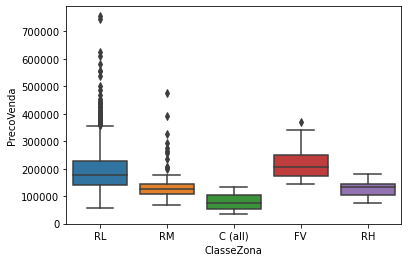

In [24]:
# observando o preço dos imóveis de acordo com algumas variáveis qualitativas

sns.boxplot(x= df['ClasseZona'], y= df['PrecoVenda'] )

### Maiores preços (outliers ?)estão na 'RL - Residencia baixa densidade'

<AxesSubplot:xlabel='Qualidade', ylabel='PrecoVenda'>

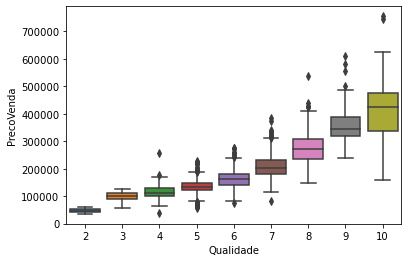

In [25]:
sns.boxplot(x= df['Qualidade'], y= df['PrecoVenda'] )

### preços de acordo com a qualidade de acabamento do imóvel

<AxesSubplot:xlabel='PrecoVenda', ylabel='ClasseImovel'>

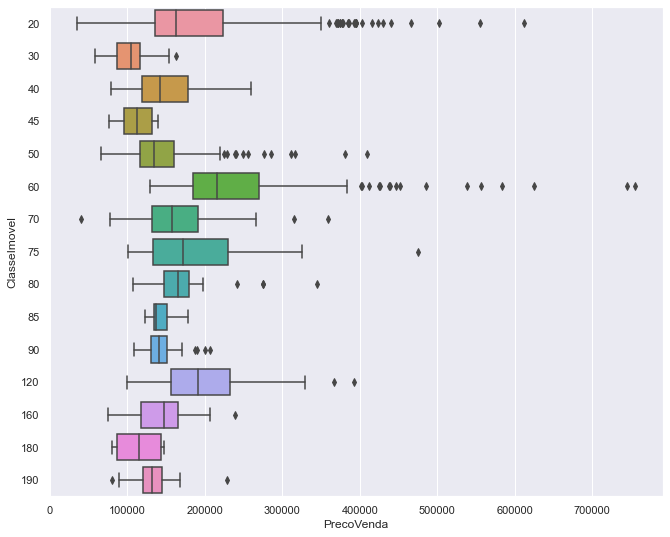

In [49]:
sns.boxplot(y= df['ClasseImovel'], x= df['PrecoVenda'] )
# imóveis com inclinação do lote severa possuem uma mediana um pouco maior nos preços.

<AxesSubplot:xlabel='PrecoVenda', ylabel='Bairro'>

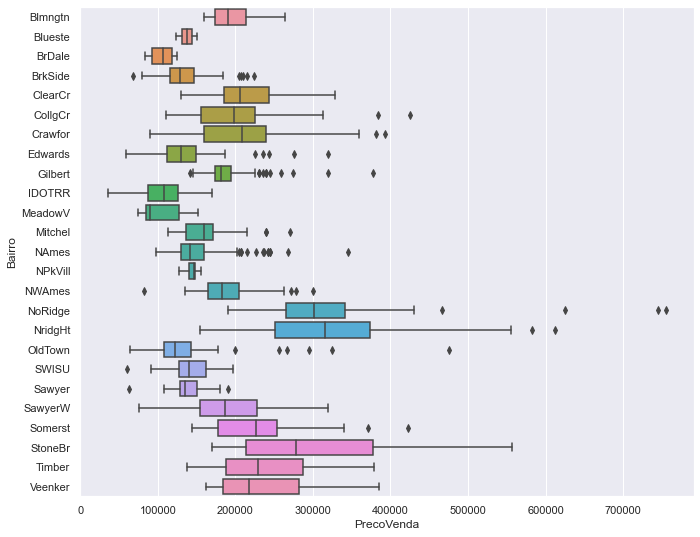

In [50]:
sns.boxplot(y= df['Bairro'], x= df['PrecoVenda'] )

In [28]:
# determinando as variáveis categóricas e numéricas
df.columns

Index(['Id', 'ClasseImovel', 'ClasseZona', 'Fachada', 'TamanhoLote', 'Rua',
       'FormaProp', 'PlanoProp', 'Servicos', 'ConfigLote', 'InclinacaoLote',
       'Bairro', 'Estrada1', 'Estrada2', 'TipoHabitacao', 'EstiloHabitacao',
       'Qualidade', 'Condicao', 'AnoConstrucao', 'AnoReforma', 'TipoTelhado',
       'MaterialTelhado', 'Exterior1', 'Exterior2', 'TipoAlvenaria',
       'AreaAlvenaria', 'QualidadeCobertura', 'CondicaoExterna',
       'TipoFundacao', 'AlturaPorao', 'CondicaoPorao', 'ParedePorao',
       'TipoAcabPorao1', 'AreaAcabPorao1', 'TipoAcabPorao2', 'AreaAcabPorao2',
       'AreaInacabPorao', 'AreaPorao', 'Aquecimento', 'QualidadeAquecimento',
       'ArCentral', 'InstalacaoEletrica', 'AreaTerreo', 'Area2Andar',
       'BaixaQualiAreaAcab', 'AreaConstruida', 'BanheiroPorao', 'LavaboPorao',
       'Banheiro', 'Lavabo', 'BedroomAbvGr', 'KitchenAbvGr',
       'QualidadeCozinha', 'TotalQuartos', 'Funcionalidade', 'Lareira',
       'LocalGaragem', 'AnoGaragem', 'AcabamentoG

In [29]:
# variáveis categóricas:
['ClasseImovel', 'ClasseZona', 'Rua','FormaProp', 'PlanoProp', 'Servicos', 'ConfigLote', 'InclinacaoLote',
 'Bairro', 'Estrada1', 'Estrada2', 'TipoHabitacao', 'EstiloHabitacao', 'Qualidade', 'Condicao', 'TipoTelhado', 'MaterialTelhado',
 'Exterior1', 'Exterior2', 'TipoAlvenaria', 'QualidadeCobertura', 'CondicaoExterna', 'TipoFundacao', 'AlturaPorao',
 'CondicaoPorao', 'ParedePorao', 'TipoAcabPorao1', 'TipoAcabPorao2', 'Aquecimento', 'QualidadeAquecimento',
 'ArCentral', 'InstalacaoEletrica', 'QualidadeCozinha', 'Funcionalidade', 'LocalGaragem', 'AcabamentoGaragem',
 'QualidadeGaragem', 'CondicaoGaragem', 'EntradaPavimentada', 'TipoVenda', 'CondicaoVenda']

['ClasseImovel',
 'ClasseZona',
 'Rua',
 'FormaProp',
 'PlanoProp',
 'Servicos',
 'ConfigLote',
 'InclinacaoLote',
 'Bairro',
 'Estrada1',
 'Estrada2',
 'TipoHabitacao',
 'EstiloHabitacao',
 'Qualidade',
 'Condicao',
 'TipoTelhado',
 'MaterialTelhado',
 'Exterior1',
 'Exterior2',
 'TipoAlvenaria',
 'QualidadeCobertura',
 'CondicaoExterna',
 'TipoFundacao',
 'AlturaPorao',
 'CondicaoPorao',
 'ParedePorao',
 'TipoAcabPorao1',
 'TipoAcabPorao2',
 'Aquecimento',
 'QualidadeAquecimento',
 'ArCentral',
 'InstalacaoEletrica',
 'QualidadeCozinha',
 'Funcionalidade',
 'LocalGaragem',
 'AcabamentoGaragem',
 'QualidadeGaragem',
 'CondicaoGaragem',
 'EntradaPavimentada',
 'TipoVenda',
 'CondicaoVenda']

In [30]:
# variáveis numéricas:
['Id', 'Fachada','TamanhoLote', 'AnoConstrucao', 'AnoReforma', 'AreaAlvenaria', 'AreaAcabPorao1', 'AreaAcabPorao2',
 'AreaInacabPorao', 'AreaPorao', 'AreaTerreo', 'Area2Andar', 'BaixaQualiAreaAcab', 'AreaConstruida', 'BanheiroPorao',
 'LavaboPorao', 'Banheiro', 'Lavabo', 'BedroomAbvGr', 'KitchenAbvGr', 'TotalQuartos', 'Lareira', 'AnoGaragem', 'CarrosGaragem',
 'AreaGaragem', 'AreaDeck', 'AreaVarandaAberta', 'AreaVarandaFechada', 'AreaVaranda3Estacoes', 'AreaAlpendre',
 'AreaPiscina', 'ValorOutros', 'MesVenda', 'AnoVenda', 'PrecoVenda']
 

['Id',
 'Fachada',
 'TamanhoLote',
 'AnoConstrucao',
 'AnoReforma',
 'AreaAlvenaria',
 'AreaAcabPorao1',
 'AreaAcabPorao2',
 'AreaInacabPorao',
 'AreaPorao',
 'AreaTerreo',
 'Area2Andar',
 'BaixaQualiAreaAcab',
 'AreaConstruida',
 'BanheiroPorao',
 'LavaboPorao',
 'Banheiro',
 'Lavabo',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotalQuartos',
 'Lareira',
 'AnoGaragem',
 'CarrosGaragem',
 'AreaGaragem',
 'AreaDeck',
 'AreaVarandaAberta',
 'AreaVarandaFechada',
 'AreaVaranda3Estacoes',
 'AreaAlpendre',
 'AreaPiscina',
 'ValorOutros',
 'MesVenda',
 'AnoVenda',
 'PrecoVenda']

In [31]:
# transformando as variáveis em categóricas
df[['ClasseImovel', 'ClasseZona', 'Rua','FormaProp', 'PlanoProp', 'Servicos', 'ConfigLote', 'InclinacaoLote',
 'Bairro', 'Estrada1', 'Estrada2', 'TipoHabitacao', 'EstiloHabitacao', 'Qualidade', 'Condicao', 'TipoTelhado', 'MaterialTelhado',
 'Exterior1', 'Exterior2', 'TipoAlvenaria', 'QualidadeCobertura', 'CondicaoExterna', 'TipoFundacao', 'AlturaPorao',
 'CondicaoPorao', 'ParedePorao', 'TipoAcabPorao1', 'TipoAcabPorao2', 'Aquecimento', 'QualidadeAquecimento',
 'ArCentral', 'InstalacaoEletrica', 'QualidadeCozinha', 'Funcionalidade', 'LocalGaragem', 'AcabamentoGaragem',
 'QualidadeGaragem', 'CondicaoGaragem', 'EntradaPavimentada', 'TipoVenda', 'CondicaoVenda']] = df[['ClasseImovel', 'ClasseZona', 'Rua','FormaProp', 'PlanoProp', 'Servicos', 'ConfigLote', 'InclinacaoLote',
 'Bairro', 'Estrada1', 'Estrada2', 'TipoHabitacao', 'EstiloHabitacao', 'Qualidade', 'Condicao', 'TipoTelhado', 'MaterialTelhado',
 'Exterior1', 'Exterior2', 'TipoAlvenaria', 'QualidadeCobertura', 'CondicaoExterna', 'TipoFundacao', 'AlturaPorao',
 'CondicaoPorao', 'ParedePorao', 'TipoAcabPorao1', 'TipoAcabPorao2', 'Aquecimento', 'QualidadeAquecimento',
 'ArCentral', 'InstalacaoEletrica', 'QualidadeCozinha', 'Funcionalidade', 'LocalGaragem', 'AcabamentoGaragem',
 'QualidadeGaragem', 'CondicaoGaragem', 'EntradaPavimentada', 'TipoVenda', 'CondicaoVenda']].astype('category')

In [32]:
# criando uma feature de areaConstruida/TamanhoLote

df['AreaConst/tamLote'] = df['AreaConstruida']/df['TamanhoLote']

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Id                    1338 non-null   int64   
 1   ClasseImovel          1338 non-null   category
 2   ClasseZona            1338 non-null   category
 3   Fachada               1338 non-null   float64 
 4   TamanhoLote           1338 non-null   int64   
 5   Rua                   1338 non-null   category
 6   FormaProp             1338 non-null   category
 7   PlanoProp             1338 non-null   category
 8   Servicos              1338 non-null   category
 9   ConfigLote            1338 non-null   category
 10  InclinacaoLote        1338 non-null   category
 11  Bairro                1338 non-null   category
 12  Estrada1              1338 non-null   category
 13  Estrada2              1338 non-null   category
 14  TipoHabitacao         1338 non-null   category
 15  Esti

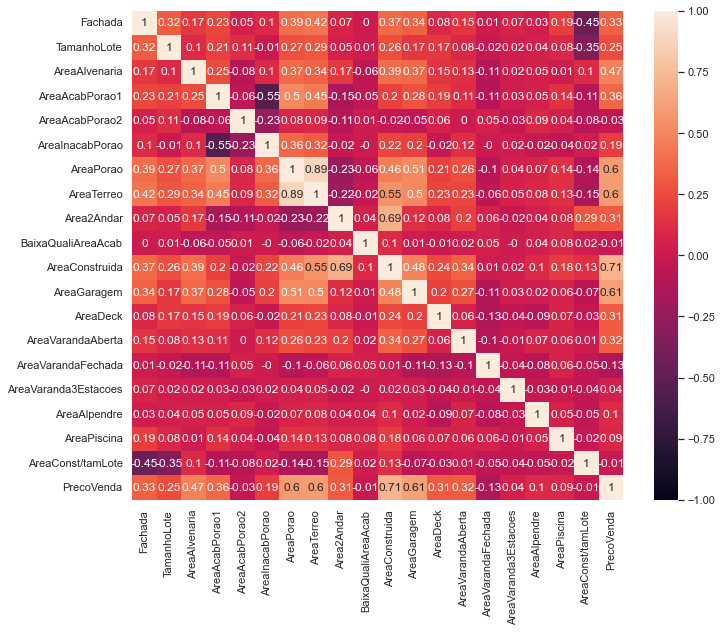

In [51]:
# Heatmap das variáveis contínuas
sns.heatmap(df[['Fachada','TamanhoLote', 'AreaAlvenaria', 'AreaAcabPorao1', 'AreaAcabPorao2',
 'AreaInacabPorao', 'AreaPorao', 'AreaTerreo', 'Area2Andar', 'BaixaQualiAreaAcab', 'AreaConstruida',
 'AreaGaragem', 'AreaDeck', 'AreaVarandaAberta', 'AreaVarandaFechada', 'AreaVaranda3Estacoes', 'AreaAlpendre',
 'AreaPiscina','AreaConst/tamLote', 'PrecoVenda']].corr().round(2), annot=True, vmin=-1, vmax=1)
sns.set(rc={"figure.figsize":(11, 9)})

### As maiores correlações com nosso alvo (PreçoVenda) são AreaPorao, AreaTerreo, AreaConstruida, Areagaragem.


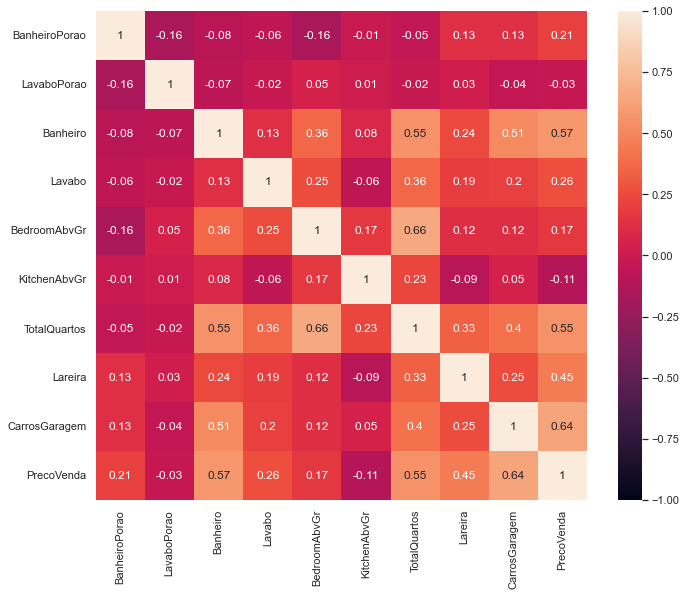

In [35]:
# heatmap das variáveis Discretas
sns.heatmap(df[['BanheiroPorao', 'LavaboPorao', 'Banheiro', 'Lavabo', 'BedroomAbvGr', 'KitchenAbvGr', 'TotalQuartos', 'Lareira', 'CarrosGaragem',
 'PrecoVenda']].corr().round(2), annot=True, vmin=-1, vmax=1)
sns.set(rc={"figure.figsize":(11, 9)})

### Maiores correlações, Banheiro, TotalQuartos, CarrosGaragem

# Objetivo 1:

In [36]:
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
from sklearn.preprocessing import power_transform

In [37]:
df['CondicaoVenda'].value_counts()

### novo dataset deve ter 1104 observações

Normal     1104
Partial     120
Abnorml      86
Family       20
Alloca        7
AdjLand       1
Name: CondicaoVenda, dtype: int64

In [38]:
# salvando novo dataset com o filtro 'condicaoVenda' == normal

novo_df = df[df['CondicaoVenda'] == 'Normal']

In [39]:
novo_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1104 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Id                    1104 non-null   int64   
 1   ClasseImovel          1104 non-null   category
 2   ClasseZona            1104 non-null   category
 3   Fachada               1104 non-null   float64 
 4   TamanhoLote           1104 non-null   int64   
 5   Rua                   1104 non-null   category
 6   FormaProp             1104 non-null   category
 7   PlanoProp             1104 non-null   category
 8   Servicos              1104 non-null   category
 9   ConfigLote            1104 non-null   category
 10  InclinacaoLote        1104 non-null   category
 11  Bairro                1104 non-null   category
 12  Estrada1              1104 non-null   category
 13  Estrada2              1104 non-null   category
 14  TipoHabitacao         1104 non-null   category
 15  Esti

In [40]:
# as variáveis selecionadas para o modelo serão: 
# AreaConst/tamLote, AreaConstruida, TotalQuartos, CarroGaragem, ClasseImóvel e Bairro  

novo_df_modelo = novo_df[['AreaConst/tamLote', 'AreaConstruida', 'TotalQuartos', 'CarrosGaragem', 'ClasseImovel', 'Bairro', 'PrecoVenda']]

In [41]:
novo_df_modelo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1104 entries, 0 to 1459
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   AreaConst/tamLote  1104 non-null   float64 
 1   AreaConstruida     1104 non-null   int64   
 2   TotalQuartos       1104 non-null   int64   
 3   CarrosGaragem      1104 non-null   int64   
 4   ClasseImovel       1104 non-null   category
 5   Bairro             1104 non-null   category
 6   PrecoVenda         1104 non-null   int64   
dtypes: category(2), float64(1), int64(4)
memory usage: 55.3 KB


In [42]:
#dummizando

df_dummie = pd.get_dummies(novo_df_modelo, columns= ['ClasseImovel', 'Bairro'], drop_first= True)

In [43]:
df_dummie.columns

Index(['AreaConst/tamLote', 'AreaConstruida', 'TotalQuartos', 'CarrosGaragem',
       'PrecoVenda', 'ClasseImovel_30', 'ClasseImovel_40', 'ClasseImovel_45',
       'ClasseImovel_50', 'ClasseImovel_60', 'ClasseImovel_70',
       'ClasseImovel_75', 'ClasseImovel_80', 'ClasseImovel_85',
       'ClasseImovel_90', 'ClasseImovel_120', 'ClasseImovel_160',
       'ClasseImovel_180', 'ClasseImovel_190', 'Bairro_Blueste',
       'Bairro_BrDale', 'Bairro_BrkSide', 'Bairro_ClearCr', 'Bairro_CollgCr',
       'Bairro_Crawfor', 'Bairro_Edwards', 'Bairro_Gilbert', 'Bairro_IDOTRR',
       'Bairro_MeadowV', 'Bairro_Mitchel', 'Bairro_NAmes', 'Bairro_NPkVill',
       'Bairro_NWAmes', 'Bairro_NoRidge', 'Bairro_NridgHt', 'Bairro_OldTown',
       'Bairro_SWISU', 'Bairro_Sawyer', 'Bairro_SawyerW', 'Bairro_Somerst',
       'Bairro_StoneBr', 'Bairro_Timber', 'Bairro_Veenker'],
      dtype='object')

In [44]:
# separando as variáveis X
var_X = df_dummie.drop(['PrecoVenda'], axis=1)
var_X

,AreaConst/tamLote,AreaConstruida,TotalQuartos,CarrosGaragem,ClasseImovel_30,ClasseImovel_40,ClasseImovel_45,ClasseImovel_50,ClasseImovel_60,ClasseImovel_70,ClasseImovel_75,ClasseImovel_80,ClasseImovel_85,ClasseImovel_90,ClasseImovel_120,ClasseImovel_160,ClasseImovel_180,ClasseImovel_190,Bairro_Blueste,Bairro_BrDale,Bairro_BrkSide,Bairro_ClearCr,Bairro_CollgCr,Bairro_Crawfor,Bairro_Edwards,Bairro_Gilbert,Bairro_IDOTRR,Bairro_MeadowV,Bairro_Mitchel,Bairro_NAmes,Bairro_NPkVill,Bairro_NWAmes,Bairro_NoRidge,Bairro_NridgHt,Bairro_OldTown,Bairro_SWISU,Bairro_Sawyer,Bairro_SawyerW,Bairro_Somerst,Bairro_StoneBr,Bairro_Timber,Bairro_Veenker
0,0.202367,1710,8,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.131458,1262,6,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0.158756,1786,6,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.154137,2198,9,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
5,0.096493,1362,5,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0.167989,1694,7,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7,0.201310,2090,7,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9,0.145148,1077,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,0.092857,1040,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
12,0.070327,912,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [45]:
# variável Y

var_Y = df_dummie['PrecoVenda']
var_Y_log = np.log(var_Y)


In [46]:
X_train, X_test, y_train, y_test = train_test_split(var_X, var_Y_log, test_size=0.2)

In [47]:
# rodando a OLS

modelo_1 = smf.ols(formula= 'y_train ~ X_train', data= df_dummie.loc[X_train.index , :]).fit()

In [48]:
modelo_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                y_train   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     103.4
Date:                Wed, 02 Feb 2022   Prob (F-statistic):          7.18e-300
Time:                        05:31:54   Log-Likelihood:                 485.26
No. Observations:                 883   AIC:                            -884.5
Df Residuals:                     840   BIC:                            -678.8
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      11.5690      0.075    153.525      0.000      11.421      11.717
X_train[0]     -0.4406      0.099     -4.446      0.000      -0.635      -0.246
X_train[1]      0.0005   2.28e-05     22.225      0.000       0.000       0.001
X_train[2]     -0.0224      0.006     -3.547      0.000      -0.035      -0.010
X_train[3]      0.0897      0.011      8.065      0.000       0.068       0.111
X_train[4]     -0.2374      0.034     -6.990      0.000      -0.304      -0.171
X_train[5]     -0.1379      0.074     -1.861      0.063      -0.283       0.008
X_train[6]     -0.2172      0.054     -4.026      0.000      -0.323      -0.111
X_train[7]     -0.1929      0.023     -8.266      0.000      -0.239      -0.147
X_train[8]     -0.0879      0.017     -5.081      0.000      -0.122      -0.054
X_train[9]     -0.2255      0.032     -6.986      0.000      -0.289      -0.162
X_train[10]    -0.2405      0.049     -4.870      0.000      -0.337      -0.144
X_train[11]     0.0012      0.025      0.049      0.961      -0.048       0.051
X_train[12]     0.0402      0.041      0.970      0.332      -0.041       0.122
X_train[13]    -0.2720      0.040     -6.799      0.000      -0.351      -0.193
X_train[14]    -0.0015      0.028     -0.054      0.957      -0.057       0.054
X_train[15]    -0.1131      0.053     -2.145      0.032      -0.217      -0.010
X_train[16]     0.0273      0.078      0.351      0.726      -0.126       0.180
X_train[17]    -0.2742      0.038     -7.177      0.000      -0.349      -0.199
X_train[18]    -0.0081      0.122     -0.067      0.947      -0.247       0.231
X_train[19]    -0.1723      0.084     -2.045      0.041      -0.338      -0.007
X_train[20]    -0.1360      0.069     -1.983      0.048      -0.271      -0.001
X_train[21]    -0.0546      0.072     -0.758      0.449      -0.196       0.087
X_train[22]    -0.0962      0.064     -1.514      0.131      -0.221       0.029
X_train[23]     0.0073      0.069      0.106      0.916      -0.128       0.143
X_train[24]    -0.2541      0.067     -3.814      0.000      -0.385      -0.123
X_train[25]    -0.1321      0.066     -1.995      0.046      -0.262      -0.002
X_train[26]    -0.2555      0.073     -3.498      0.000      -0.399      -0.112
X_train[27]    -0.3667      0.078     -4.710      0.000      -0.520      -0.214
X_train[28]    -0.1893      0.067     -2.817      0.005      -0.321      -0.057
X_train[29]    -0.2398      0.064     -3.744      0.000      -0.366      -0.114
X_train[30]    -0.1121      0.079     -1.418      0.157      -0.267       0.043
X_train[31]    -0.1886      0.066     -2.850      0.004      -0.318      -0.059
X_train[32]    -0.0441      0.069     -0.637      0.524      -0.180       0.092
X_train[33]     0.0800      0.065      1.235      0.217      -0.047       0.207
X_train[34]    -0.2950      0.066     -4.47

Nosso modelo apresento um R quadrado de 0.839. 
O teste de Durbin-Watson demonstrou que não existe autocorrelação.

